# CTC Prediction

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Read data from the file

train = pd.read_excel('Data_file.xlsx')

In [4]:
train

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
2,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
3,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
4,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
...,...,...,...,...,...,...,...,...,...
1335,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1336,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1337,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1338,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [5]:
#Fixing column names

names = train[train.index == 1].values.tolist()
train.columns = names
train

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
2,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
3,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
4,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
...,...,...,...,...,...,...,...,...,...
1335,1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1336,1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1337,1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1338,1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [6]:
#Dropping missing values and duplicates

train = train.dropna()
train = train.drop_duplicates()
train = train.drop(['S.No.'], axis=1)
train = train[1:len(train)]

train

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
2,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
3,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
4,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
5,Tier 3,Executive,Metro,49010,2,81,33,82092.38688
6,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1335,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1336,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1337,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1338,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [7]:
#Converting categorical variables to numerical variables

label_encoder_col = LabelEncoder()
label_encoder_role = LabelEncoder()
label_encoder_city = LabelEncoder()

train['College'] = label_encoder_col.fit_transform(train['College'])
train['Role'] = label_encoder_role.fit_transform(train['Role'])
train['City type'] = label_encoder_city.fit_transform(train['City type'])

train

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
2,0,1,1,55523,3,66,19,71406.576531
3,1,0,0,57081,1,84,18,68005.870631
4,1,0,0,60347,2,52,28,76764.020277
5,2,0,0,49010,2,81,33,82092.38688
6,2,0,0,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1335,2,0,0,59661,4,68,50,69712.403655
1336,0,0,1,53714,1,67,18,69298.750099
1337,1,0,1,61957,1,47,18,66397.770686
1338,0,0,1,53203,3,69,21,64044.382949


In [8]:
#Split the training data into features and labels dataframes

X_train = train[train.columns[:7]]
X_train

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
2,0,1,1,55523,3,66,19
3,1,0,0,57081,1,84,18
4,1,0,0,60347,2,52,28
5,2,0,0,49010,2,81,33
6,2,0,0,57879,4,74,32
...,...,...,...,...,...,...,...
1335,2,0,0,59661,4,68,50
1336,0,0,1,53714,1,67,18
1337,1,0,1,61957,1,47,18
1338,0,0,1,53203,3,69,21


In [9]:
y_train = train['CTC']
y_train

,CTC
2,71406.576531
3,68005.870631
4,76764.020277
5,82092.38688
6,73878.097729
...,...
1335,69712.403655
1336,69298.750099
1337,66397.770686
1338,64044.382949


In [10]:
#Cleaning the test dataset 

test = pd.read_excel('Test_data_file.xlsx')
test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1334,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1335,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1336,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949


In [11]:
#Label encoder to convert categorical variables

test['College'] = label_encoder_col.fit_transform(test['College'])
test['Role'] = label_encoder_role.fit_transform(test['Role'])
test['City type'] = label_encoder_city.fit_transform(test['City type'])

test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC
0,0,1,1,55523,3,66,19,71406.576531
1,1,0,0,57081,1,84,18,68005.870631
2,1,0,0,60347,2,52,28,76764.020277
3,2,0,0,49010,2,81,33,82092.386880
4,2,0,0,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1333,2,0,0,59661,4,68,50,69712.403655
1334,0,0,1,53714,1,67,18,69298.750099
1335,1,0,1,61957,1,47,18,66397.770686
1336,0,0,1,53203,3,69,21,64044.382949


In [12]:
#Splitting the test set into feature and label dataframes

X_test = test[test.columns[:7]]
X_test

,College,Role,City type,previous CTC,previous job changes,Graduation marks,Exp
0,0,1,1,55523,3,66,19
1,1,0,0,57081,1,84,18
2,1,0,0,60347,2,52,28
3,2,0,0,49010,2,81,33
4,2,0,0,57879,4,74,32
...,...,...,...,...,...,...,...
1333,2,0,0,59661,4,68,50
1334,0,0,1,53714,1,67,18
1335,1,0,1,61957,1,47,18
1336,0,0,1,53203,3,69,21


In [13]:
y_test = test['Actual CTC']
y_test

0       71406.576531
1       68005.870631
2       76764.020277
3       82092.386880
4       73878.097729
            ...     
1333    69712.403655
1334    69298.750099
1335    66397.770686
1336    64044.382949
1337    83346.060961
Name: Actual CTC, Length: 1338, dtype: float64

In [14]:
#Implementing linear regression

lin = LinearRegression().fit(X_train.values, y_train.values)

In [15]:
#Predicting the output

y_pred = lin.predict(X_test.values)

In [16]:
#Mean squared error between the predicted and original labels

print(mean_squared_error(y_test, y_pred))

63471652.07488195


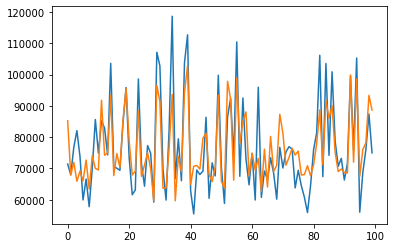

In [17]:
plt.plot(y_test[:100])
plt.plot(y_pred[:100])